# Part 1 - Data Prep

**For those using Google Colab** _A restart may be needed to properly load the modules needed for PANNA._

In this exercise, we will go through the same workflow as done in the first two tutorials, but will train potentials on a larger dataset of Carbon structures. We will also explore how the size and diversity of the dataset affect how well can our trained potentials describe  ser

The notebook will be split into the following parts:

1. Data Preparation _(We're not starting from `.xml` files.)_ - Convert the `.example` files to TensorFlow Records (`.tfr`) to be read by PANNA using `gvect_calculator.py` and `tfr_packer.py`  and the corresponding `.ini` files you will have to modify from the tutorials. 

2. Training and Validation - Train a neural network potential (NNP). Validate how well the model predicts the energies of structures that are not part of the dataset.

3. Tune the model - See if we need to tune our training parameters if our first attempts to train the network do not look satisfactory.

In the next notebook, we will: explore how changing the size or diversity of the dataset affects the training as well as the validation of the potentials. 

## 1a - Loading modules

Like the first two tutorials, we have to load the necessary packages below. Make sure you uncomment the right section depending on whether you're using Colab or a local jupyter notebook copy. 

### For google colab

In [ ]:
import os

# Specify the absolute path to PANNA (or leave this relative path)
panna_dir = os.path.abspath('../..')

## <COLAB-RELEVANT>. Uncomment if you're using google colab  ##
from google.colab import drive
drive.mount('/content/drive')
## ACTION NEEDED: Modify the directory so it points to 'panna-master' folder in your drive ##
# panna_dir =  '/content/drive/MyDrive/.../how2trainyournetwork_course/panna-master'
panna_dir = '/content/drive/MyDrive/SISSA/MLMS-SISSA/how2trainyournetwork_course/panna-master/'


# Cleaning up path for command line
panna_cmdir = panna_dir.replace(' ', '\ ')

# Check if PANNA is installed, otherwise install it
try:
  import panna
  print("PANNA is installed correctly")
except ModuleNotFoundError:
  print("PANNA not found, attempting to install")
  !pip install {panna_cmdir}

### For jupyter notebooks

This part assumes that you have already installed the prerequisites of PANNA. You can follow the directions in the `README.md` if you haven't done so yet.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

## 1b - Data preparation

### Converting `.example` -> `.gvector`

We will be using a dataset of 1000 diamond-like structures, with 20% set aside for validation while the remaining is used for training. Unpack the `datasets/diamond_1000.zip` file and you will see that the training and validation subdirectories have been split already.

Now we convert the `.example` files to gvectors. Use `gvect_calculator.py` and create your configuration file for running the code. If you are using the `.ini` file from the tutorial, you can keep most of the gvector parameters constant and just change the directories and the species.

#### Training set

In [5]:
!python 'panna-master/src/panna/gvect_calculator.py' --config 'input_files/gvect_dia1000_train.ini'

2025-01-18 13:24:30.079213: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO - 
    ____   _    _   _ _   _    _           
   |  _ \ / \  | \ | | \ | |  / \     
   | |_) / _ \ |  \| |  \| | / _ \     
   |  __/ ___ \| |\  | |\  |/ ___ \    
   |_| /_/   \_\_| \_|_| \_/_/   \_\ 

 Properties from Artificial Neural Network Architectures

INFO - PBC will be determined by lattice parameters in the json file for each example
INFO - Radial Gaussian centers are set by Rs0_rad, Rc_rad, RsN_rad
INFO - Angular descriptor centers are set by ThetasN
INFO - Radial-angular Gaussian centers are set by Rs0_ang, Rc_ang, RsN_ang
INFO - g type: mBP
INFO - g DOI: 10.1016/j.cpc.2020.107402
INFO - g size: 48
INFO - the computation has been restarted (a file named gvect_already_computed.dat has been found).Already computed files will not be recomputed.
INFO - computed keys 800/800
INFO - --start--
INFO - ----run----


#### Validation set

Unlike `tutorial_1_data_prep.ipynb`, this time we will obtain the gvectors for the validation set explicitly. To avoid confusion, you may use a separate `.ini` file for this.

In [7]:
!python 'panna-master/src/panna/gvect_calculator.py' --config 'input_files/gvect_dia1000_val.ini'

2025-01-18 13:41:11.033085: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO - 
    ____   _    _   _ _   _    _           
   |  _ \ / \  | \ | | \ | |  / \     
   | |_) / _ \ |  \| |  \| | / _ \     
   |  __/ ___ \| |\  | |\  |/ ___ \    
   |_| /_/   \_\_| \_|_| \_/_/   \_\ 

 Properties from Artificial Neural Network Architectures

INFO - PBC will be determined by lattice parameters in the json file for each example
INFO - Radial Gaussian centers are set by Rs0_rad, Rc_rad, RsN_rad
INFO - Angular descriptor centers are set by ThetasN
INFO - Radial-angular Gaussian centers are set by Rs0_ang, Rc_ang, RsN_ang
INFO - g type: mBP
INFO - g DOI: 10.1016/j.cpc.2020.107402
INFO - g size: 48
INFO - computed keys 0/200
INFO - --start--
INFO - ----run----
INFO - start parallel computation, 196 to go
INFO - ----run----
INFO - start parallel computation, 192 to go
INFO - ----run----
INFO - start parallel computation, 188 to go
INFO - ----run

### Packing to `.tfr`

As previously, we run `tfr_packer.py` for training and validation sets separately.

In [10]:
# Training
!python 'panna-master/src/panna/tfr_packer.py' --config 'input_files/tfr_dia1000_train.ini'

2025-01-18 13:46:17.335642: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO - file 1/8
INFO - file already computed
INFO - file 2/8
INFO - file already computed
INFO - file 3/8
INFO - file already computed
INFO - file 4/8
INFO - file already computed
INFO - file 5/8
INFO - file already computed
INFO - file 6/8
INFO - file already computed
INFO - file 7/8
INFO - file already computed
INFO - file 8/8
INFO - file already computed


In [11]:
# Validation
!python 'panna-master/src/panna/tfr_packer.py' --config 'input_files/tfr_dia1000_val.ini'

2025-01-18 13:46:41.336974: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO - file 1/2
INFO - file 2/2


# 2 - Training and validation

Once the data has been prepared for both the training and validation sets, we now 
* modify the `.ini` file from the tutorial to appropriate values for our monoatomic Carbon dataset. This can mean changing the directories, offset values, gsize, etc.
* perform a quick trial training to see if (a) there are no errors in input/outputs and (b) we are adequately training.


## 2a - Checking for consistency in `gsize`

Since you have to define the `g_size` parameter in the `[DEFAULT_NETWORK]` section of your configuration file, it would not hurt check what is the correct value as is done in `tutorial_1_data_prep.ipynb`.


In [8]:
units = 'angstrom'
# radial
rc_rad = 4.6
rs0_rad = 0
rsn_rad = 16
rsst_rad = (rc_rad - rs0_rad) / rsn_rad
rs_rad = np.arange(rs0_rad, rc_rad, rsst_rad)
eta_rad = 16
eta_rad = np.tile(np.asarray(eta_rad), len(rs_rad))

# angular
thetasn = 8
step_theta = np.pi / thetasn
thetas = np.arange(0, np.pi, step_theta) + .5 * step_theta
zeta = 50
zeta = np.tile(np.asarray(zeta), len(thetas))

# radial_angular components
rc_ang = 3.1
rs0_ang = 0
rsn_ang = 4
rsst_ang = (rc_ang - rs0_ang) / rsn_ang
rs_ang = np.arange(rs0_ang, rc_ang, rsst_ang)
eta_ang = 6.0
eta_ang = np.tile(np.asarray(eta_ang), len(rs_ang))

In [9]:
from panna.gvector import GvectmBP
species = 'C'
gvect_func = GvectmBP(species=species)
nsp = len(species.split(','))

gvect_func.units = units
gvect_func.update_parameter('Rc_rad', rc_rad)
gvect_func.update_parameter('Rs_rad', rs_rad)
gvect_func.update_parameter('eta_rad', eta_rad)
gvect_func.update_parameter('Thetas', thetas)
gvect_func.update_parameter('zeta', zeta)
gvect_func.update_parameter('Rc_ang', rc_ang)
gvect_func.update_parameter('Rs_ang', rs_ang)
gvect_func.update_parameter('eta_ang', eta_ang)

print("Number of species is: {}".format(nsp))

print("Size of the radial part is: {}".format(len(rs_rad) * nsp))

print("Size of the angular part \
for each species permutation is: {}".format(len(thetas)*len(rs_ang)))

print("There are {} 3-body species permutations \
hence the total size of the angularpart is: {} ".format((nsp*nsp+nsp)//2 , len(thetas)*len(rs_ang) *(nsp*nsp+nsp)//2 ))

print("The total size of the G-vector with these parameters is: {}".
        format(gvect_func.gsize))

Number of species is: 1
Size of the radial part is: 16
Size of the angular part for each species permutation is: 32
There are 1 3-body species permutations hence the total size of the angularpart is: 32 
The total size of the G-vector with these parameters is: 48


## 2b - Training and validation

A sample `train.ini` file is shown for you below. Keep in mind that `gsize` changes according to how you set up your gvectors.

In [20]:
!cat 'input_files/train_dia1000_trial.ini'

[IO_INFORMATION]
data_dir = ./tfr/diamond_1000/train
train_dir = ./train_diamond1000_trial
log_frequency = 100
save_checkpoint_steps = 500

[DATA_INFORMATION]
atomic_sequence = C
output_offset = -253.67376683573406

[TRAINING_PARAMETERS]
batch_size = 20
learning_rate = 0.01
steps_per_epoch = 1000
max_epochs = 10

[DEFAULT_NETWORK]
g_size = 48
architecture = 128:32:1
trainable = 1:1:1

[VALIDATION_OPTIONS]
data_dir = ./tfr/diamond_1000/val

In [14]:
!python 'panna-master/src/panna/train.py' --config 'input_files/train_dia1000_trial.ini'

2025-01-18 13:57:28.830030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO - 
    ____   _    _   _ _   _    _           
   |  _ \ / \  | \ | | \ | |  / \     
   | |_) / _ \ |  \| |  \| | / _ \     
   |  __/ ___ \| |\  | |\  |/ ___ \    
   |_| /_/   \_\_| \_|_| \_/_/   \_\ 

 Properties from Artificial Neural Network Architectures

INFO - reading input_files/train_dia1000.ini
INFO - Found a default network!
INFO - This network size will be used as default for all species unless specified otherwise
Epoch 1/10
1000/1000 [==============================] - 9s 4ms/step - tot_st: 1000.0000 - MAE/at: 0.0586 - val_MAE/at: 0.0362
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - tot_st: 2000.0000 - MAE/at: 0.0378 - val_MAE/at: 0.0255
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - tot_st: 3000.0000 - MAE/at: 0.0315 - val_MAE/at: 0.0164
Epoch 4/10
1000/1000 [==============================] - 2s 2m

## 2c - Visualization

We can quickly visualize the trial training run to see if we have trained our potential satisfiably.


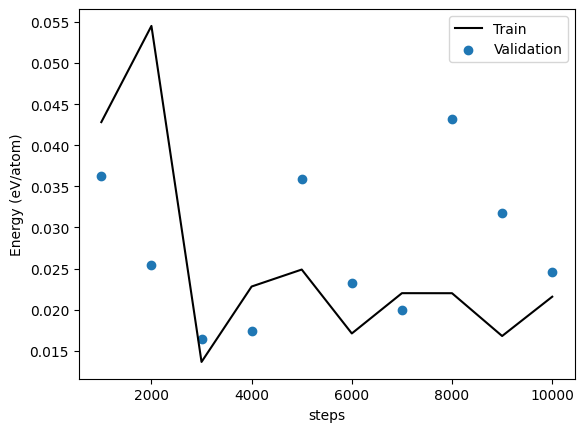

In [19]:
df_trial = pd.read_csv('train_diamond1000_trial/metrics.dat', delim_whitespace=True)
plt.plot(df_trial['tot_st'], df_trial['MAE/at'], color='k', label='Train')
plt.scatter(df_trial['tot_st'], df_trial['val_MAE/at'], label='Validation')
plt.ylabel('Energy (eV/atom)')
plt.xlabel('steps')
plt.legend()
plt.show()

# 3 - Tuning

If the training curve of our trial run looks like it has not converged (i.e. training errors have not saturated), one of the ways is to tune the training parameters (we can also tune the gvectors/descriptors, but not for this exercise). 

Here are the following ways to 

For example, we can increased the number of `steps_per_epoch` tenfold.

In [28]:
!cat 'input_files/train_dia1000_tuned.ini'

[IO_INFORMATION]
data_dir = ./tfr/diamond_1000/train
train_dir = ./train_diamond1000_tuned
log_frequency = 100
save_checkpoint_steps = 500

[DATA_INFORMATION]
atomic_sequence = C
output_offset = -253.67376683573406

[TRAINING_PARAMETERS]
batch_size = 20
learning_rate = 1e-5
steps_per_epoch = 10000
max_epochs = 10

[DEFAULT_NETWORK]
g_size = 48
architecture = 128:32:1
trainable = 1:1:1

[VALIDATION_OPTIONS]
data_dir = ./tfr/diamond_1000/val

In [ ]:
!python 'panna-master/src/panna/train.py' --config 'input_files/train_dia1000_tuned.ini'

2025-01-18 14:22:18.413323: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO - 
    ____   _    _   _ _   _    _           
   |  _ \ / \  | \ | | \ | |  / \     
   | |_) / _ \ |  \| |  \| | / _ \     
   |  __/ ___ \| |\  | |\  |/ ___ \    
   |_| /_/   \_\_| \_|_| \_/_/   \_\ 

 Properties from Artificial Neural Network Architectures

INFO - reading input_files/train_dia1000_tuned.ini
INFO - Found a default network!
INFO - This network size will be used as default for all species unless specified otherwise
Epoch 1/10
10000/10000 [==============================] - 22s 2ms/step - tot_st: 10000.0000 - MAE/at: 0.0721 - val_MAE/at: 0.0474
Epoch 2/10
10000/10000 [==============================] - 19s 2ms/step - tot_st: 20000.0000 - MAE/at: 0.0361 - val_MAE/at: 0.0224
Epoch 3/10
10000/10000 [==============================] - 19s 2ms/step - tot_st: 30000.0000 - MAE/at: 0.0285 - val_MAE/at: 0.0147
Epoch 4/10
10000/10000 [===================

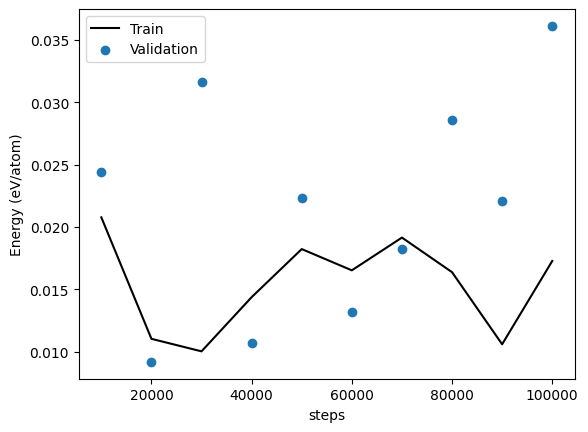

In [27]:
df_tuned = pd.read_csv('train_diamond1000_tuned/metrics.dat', delim_whitespace=True)
plt.plot(df_tuned['tot_st'], df_tuned['MAE/at'], color='k', label='Train')
plt.scatter(df_tuned['tot_st'], df_tuned['val_MAE/at'], label='Validation')
plt.ylabel('Energy (eV/atom)')
plt.xlabel('steps')
plt.legend()
plt.show()